In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载

In [2]:
data=pd.read_excel("./附件.xlsx")
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,...,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,34,2,5,37.0,1,3,13,9,中等型,...,10:00:00,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,33,2,5,42.0,1,0,0,3,安静型,...,11:00:00,0.0,4.0,NaN,补充说明（数值含义）,NaN,NaN,NaN,NaN,NaN
2,3,37,2,5,41.0,1,4,8,9,安静型,...,12:00:00,1.0,2.0,NaN,数值,婚姻状况,教育程度,分娩方式,婴儿性别,入睡方式
3,4,31,2,5,37.5,1,6,16,13,安静型,...,11:00:00,2.0,1.0,NaN,1,未婚,小学,自然分娩,男性,哄睡法：通过轻声哄唤、摇晃、拍打等方式，使婴儿感到安全和舒适，进而入睡。
4,5,36,1,5,40.0,1,1,3,3,中等型,...,10:30:00,1.0,4.0,NaN,2,已婚,初中,剖宫产,女性,抚触法：通过轻柔的按摩、揉捏等方式，促进婴儿的放松和入睡。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,31,2,3,39.5,1,1,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,407,26,2,2,37.0,1,4,9,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,408,26,2,5,39.0,1,0,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,409,27,2,5,41.2,1,0,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   编号             410 non-null    int64  
 1   母亲年龄           410 non-null    int64  
 2   婚姻状况           410 non-null    int64  
 3   教育程度           410 non-null    int64  
 4   妊娠时间（周数）       410 non-null    float64
 5   分娩方式           410 non-null    int64  
 6   CBTS           410 non-null    int64  
 7   EPDS           410 non-null    int64  
 8   HADS           410 non-null    int64  
 9   婴儿行为特征         390 non-null    object 
 10  婴儿性别           410 non-null    int64  
 11  婴儿年龄（月）        410 non-null    int64  
 12  整晚睡眠时间（时：分：秒）  390 non-null    object 
 13  睡醒次数           390 non-null    float64
 14  入睡方式           390 non-null    float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    13 non-null     object 
 17  Unnamed: 17    7 non-null      object 
 18  Unnamed: 1

In [4]:
##从上面的数据展示中我们可以看到源数据中存在一些空值和用于解释说明的文字这些并不是我们需要的，因此我们需要进行数据清洗
##data = data.drop(columns=data.columns[-1])
data = data.iloc[0:390,0:15]
data.columns = data.columns.str.strip()
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,27,2,5,42.0,1,12,20,14,中等型,1,1,09:00:00,1.0,2.0
386,387,31,2,3,39.0,1,4,7,12,中等型,1,2,11:00:00,2.0,4.0
387,388,31,2,5,41.6,1,0,3,1,安静型,1,1,10:30:00,2.0,1.0
388,389,27,2,3,40.0,1,1,10,5,安静型,1,1,06:00:00,2.0,1.0


In [5]:
data.info()
##该数据中没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   编号             390 non-null    int64  
 1   母亲年龄           390 non-null    int64  
 2   婚姻状况           390 non-null    int64  
 3   教育程度           390 non-null    int64  
 4   妊娠时间（周数）       390 non-null    float64
 5   分娩方式           390 non-null    int64  
 6   CBTS           390 non-null    int64  
 7   EPDS           390 non-null    int64  
 8   HADS           390 non-null    int64  
 9   婴儿行为特征         390 non-null    object 
 10  婴儿性别           390 non-null    int64  
 11  婴儿年龄（月）        390 non-null    int64  
 12  整晚睡眠时间（时：分：秒）  390 non-null    object 
 13  睡醒次数           390 non-null    float64
 14  入睡方式           390 non-null    float64
dtypes: float64(3), int64(10), object(2)
memory usage: 45.8+ KB


In [6]:
data.describe()

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿性别,婴儿年龄（月）,睡醒次数,入睡方式
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,30.279487,2.002564,4.100000,39.096410,1.012821,5.974359,9.105128,7.858974,1.482051,1.953846,1.461538,3.025641
std,112.727548,4.403941,0.369107,0.984586,1.912061,0.112644,5.015078,6.834189,4.296601,0.500320,0.819382,1.612071,1.408516
min,1.000000,19.000000,1.000000,1.000000,26.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,98.250000,27.000000,2.000000,3.000000,38.000000,1.000000,2.000000,4.000000,5.000000,1.000000,1.000000,0.000000,2.000000
50%,195.500000,30.000000,2.000000,4.000000,39.200000,1.000000,5.000000,8.000000,7.000000,1.000000,2.000000,1.000000,4.000000
75%,292.750000,33.000000,2.000000,5.000000,40.400000,1.000000,9.000000,13.000000,11.000000,2.000000,3.000000,2.000000,4.000000
max,390.000000,47.000000,6.000000,5.000000,43.000000,2.000000,21.000000,28.000000,20.000000,2.000000,3.000000,10.000000,5.000000


In [7]:
data = data[data["婚姻状况"].isin([1,2])]##在原始数据中存在题目中存在异常值因此删除
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,27,2,5,42.0,1,12,20,14,中等型,1,1,09:00:00,1.0,2.0
386,387,31,2,3,39.0,1,4,7,12,中等型,1,2,11:00:00,2.0,4.0
387,388,31,2,5,41.6,1,0,3,1,安静型,1,1,10:30:00,2.0,1.0
388,389,27,2,3,40.0,1,1,10,5,安静型,1,1,06:00:00,2.0,1.0


In [8]:
data[data["整晚睡眠时间（时：分：秒）"] == "99:99"]

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
179,180,29,2,4,41.0,1,1,3,2,中等型,1,3,99:99,0.0,4.0


In [9]:
data.drop([179], axis = 0, inplace = True)
data

C:\Users\29556\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,27,2,5,42.0,1,12,20,14,中等型,1,1,09:00:00,1.0,2.0
386,387,31,2,3,39.0,1,4,7,12,中等型,1,2,11:00:00,2.0,4.0
387,388,31,2,5,41.6,1,0,3,1,安静型,1,1,10:30:00,2.0,1.0
388,389,27,2,3,40.0,1,1,10,5,安静型,1,1,06:00:00,2.0,1.0


In [10]:
data["整晚睡眠时间（时：分：秒）"] = pd.to_datetime(data["整晚睡眠时间（时：分：秒）"],format='%H:%M:%S')
data["整晚睡眠时间（时：分：秒）"] = data["整晚睡眠时间（时：分：秒）"].apply(lambda x : x.hour*60 + x.minute)


<ipython-input-10-737c857f79fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["整晚睡眠时间（时：分：秒）"] = pd.to_datetime(data["整晚睡眠时间（时：分：秒）"],format='%H:%M:%S')
<ipython-input-10-737c857f79fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["整晚睡眠时间（时：分：秒）"] = data["整晚睡眠时间（时：分：秒）"].apply(lambda x : x.hour*60 + x.minute)


In [11]:
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,600,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,660,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,720,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,660,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,630,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,27,2,5,42.0,1,12,20,14,中等型,1,1,540,1.0,2.0
386,387,31,2,3,39.0,1,4,7,12,中等型,1,2,660,2.0,4.0
387,388,31,2,5,41.6,1,0,3,1,安静型,1,1,630,2.0,1.0
388,389,27,2,3,40.0,1,1,10,5,安静型,1,1,360,2.0,1.0


In [12]:
## 将婴儿行为特征转化为可度量的数字数据
data["婴儿行为特征"] = data["婴儿行为特征"].astype("category").cat.codes
data.head(10)

<ipython-input-12-a1d6cbc491c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["婴儿行为特征"] = data["婴儿行为特征"].astype("category").cat.codes


,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,0,1,1,600,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,1,2,3,660,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,1,1,1,720,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,1,2,3,660,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,0,2,3,630,1.0,4.0
5,6,32,2,5,41.0,1,1,2,3,1,1,1,720,0.0,4.0
6,7,28,2,4,41.0,1,17,25,16,2,2,3,600,1.0,4.0
7,8,34,2,5,39.0,1,8,9,7,2,1,3,600,1.0,4.0
8,9,32,2,5,41.3,1,1,4,3,0,1,1,600,1.0,2.0
9,10,34,1,3,37.2,1,3,5,10,1,1,3,660,0.0,4.0


In [13]:
## 计算皮尔逊相关系数
clist=['#3FBEBC','#E226D8','#C333A3','#3AB921','#DE6316','#DECED7']
newcmp = LinearSegmentedColormap.from_list('mycmap',clist)


In [17]:
corr = data.drop(columns = "编号").corr(method = "spearman")

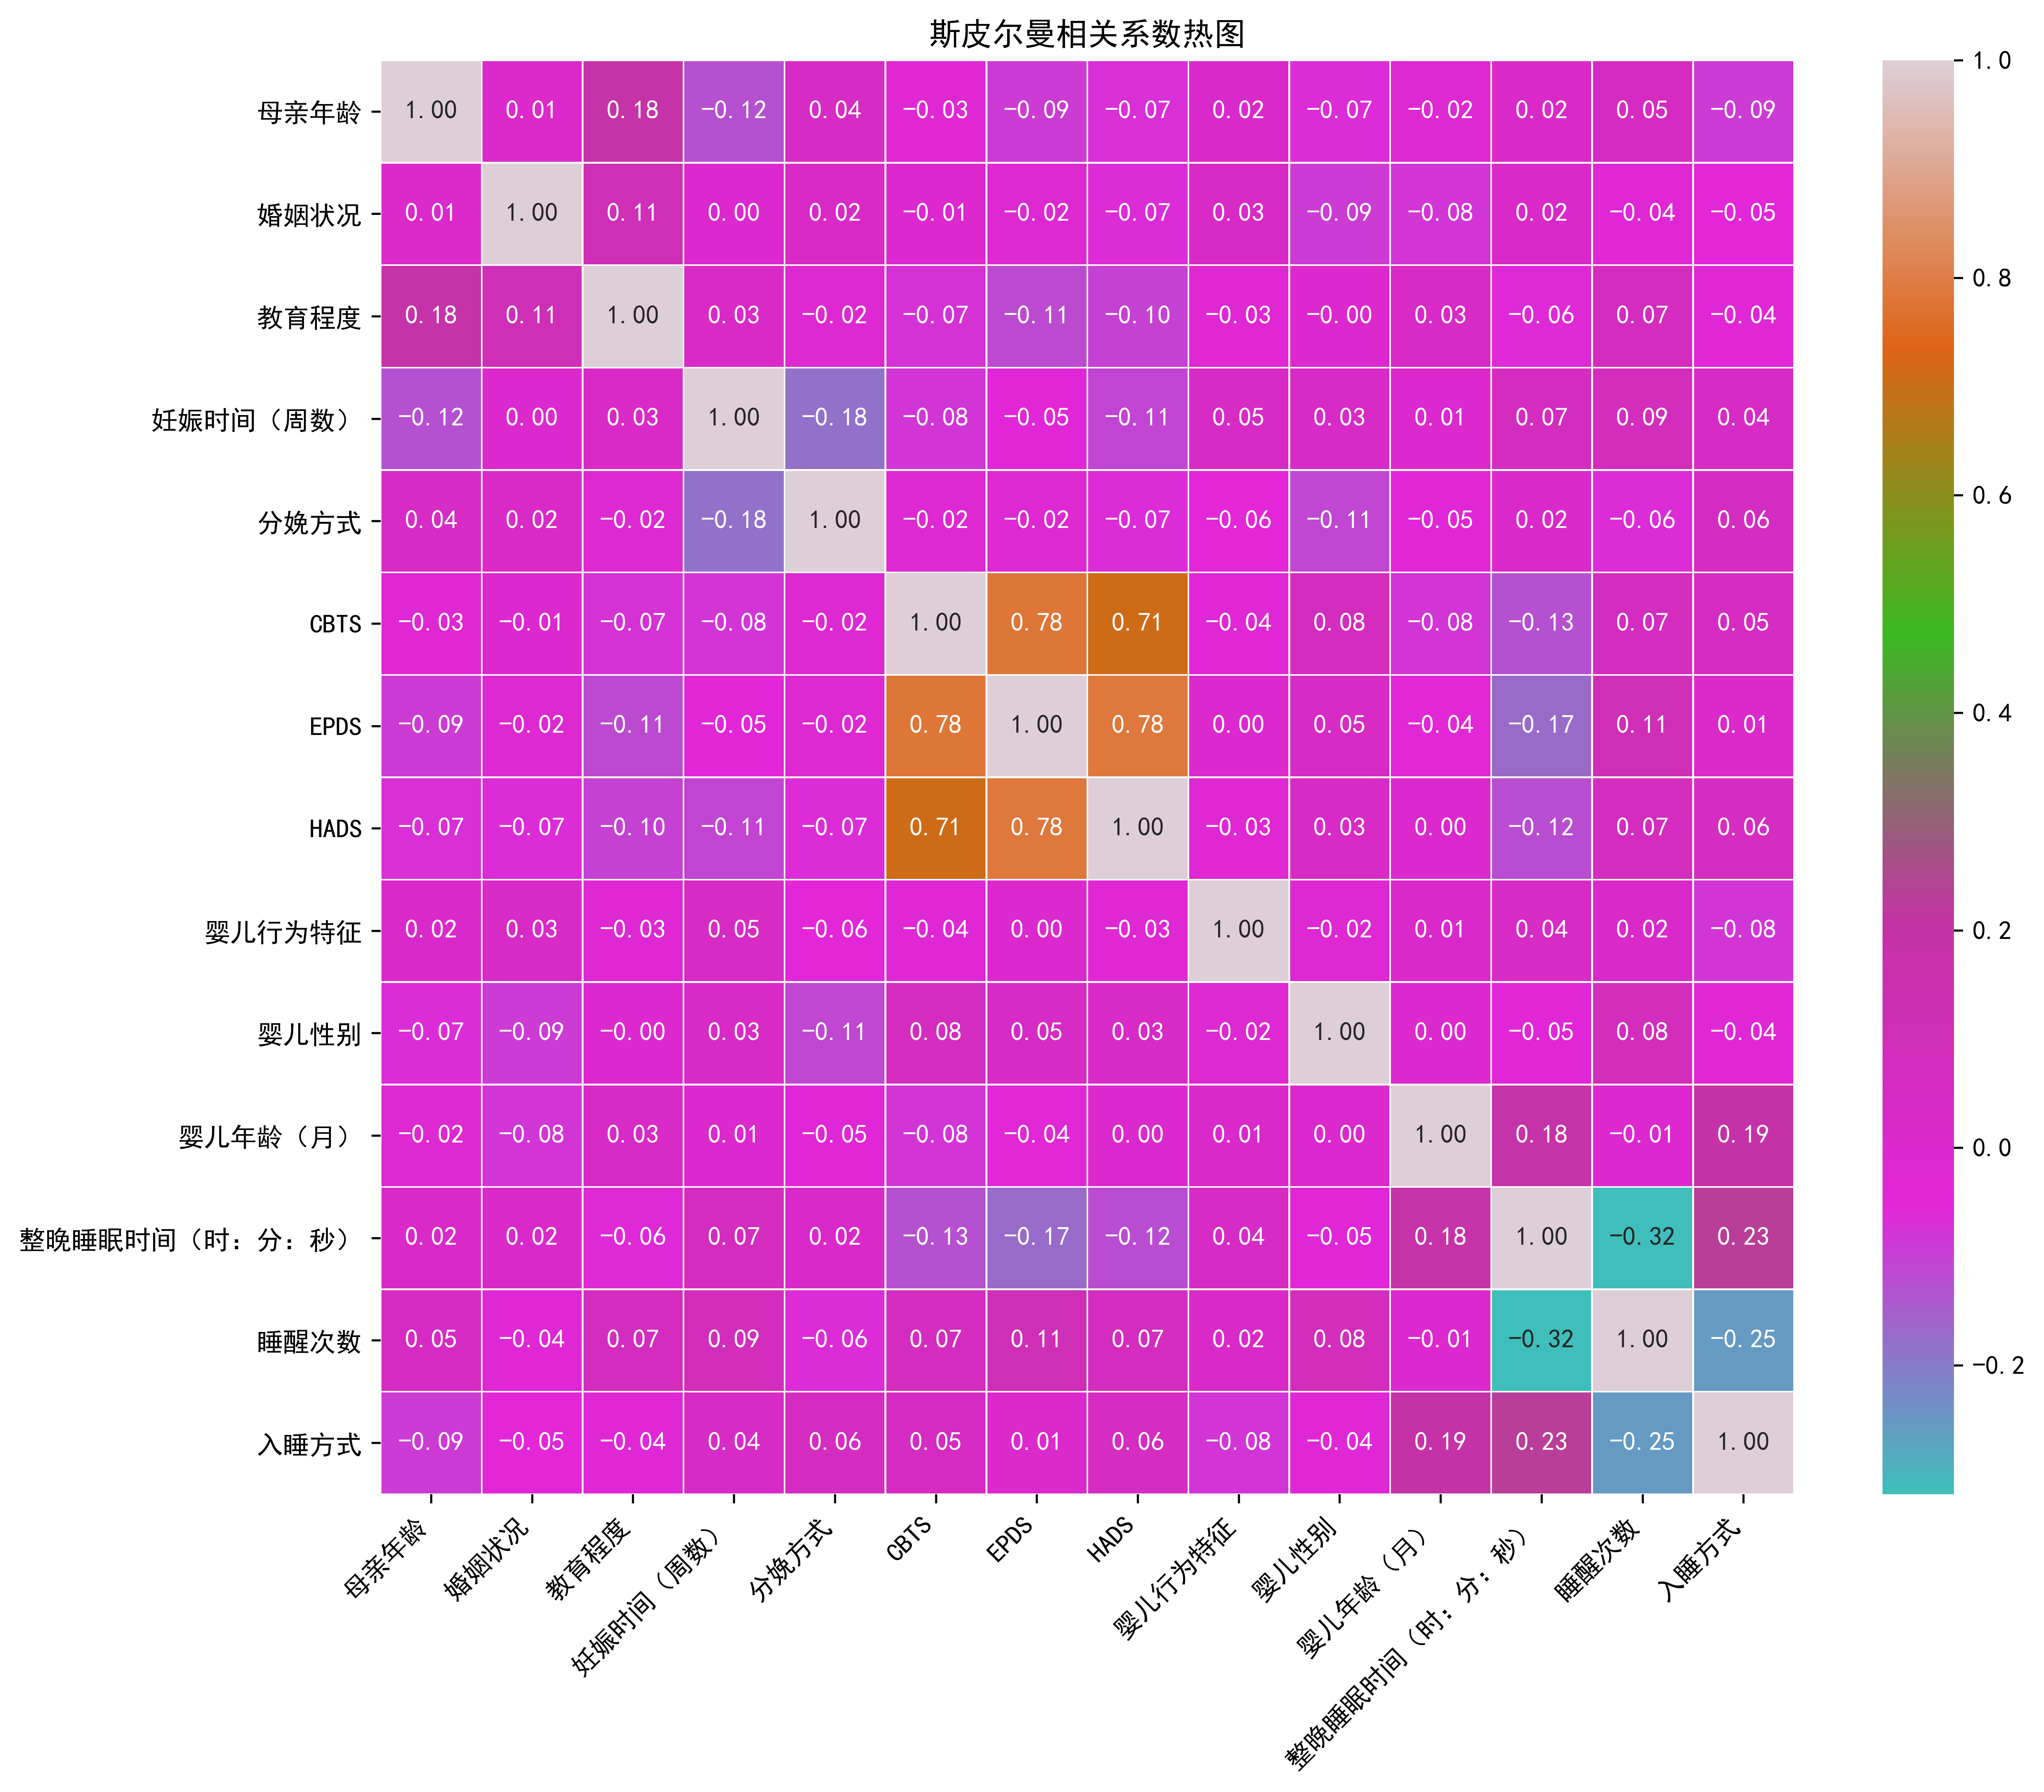

In [20]:
plt.figure(figsize=(12,10),dpi = 500)
sns.heatmap(corr,cmap = newcmp,annot = True,fmt = ".2f",linewidths =0.5 )
plt.xticks(rotation = 45,ha = "right")##旋转字体
plt.title("斯皮尔曼相关系数热图")
plt.show()

In [23]:
resultPath = "./处理之后的文件.xlsx"

In [24]:
data.to_excel(resultPath,sheet_name = "汇总",index = False)